In [82]:
import sys
#sys.modules.pop('CLASS_BABY')
#sys.modules.pop('CLASS_SAMPLE')


from CLASS_BABY import *
from CLASS_SAMPLE import *

import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

In [2]:
def median_in_bins_err(x,y,x1,x2,nbins,p1=0.25,p2=0.75):
    medians_x = np.zeros(nbins)
    medians_y = np.zeros(nbins)
    err_y_low = np.zeros(nbins)
    err_y_high = np.zeros(nbins)
    x = np.array(x)
    y = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        #print x_low, x_high
        sel = np.where((x>x_low)&(x<x_high))
        temp_ord = np.copy(y[sel])
        temp_ord = np.sort(temp_ord)
        medians_y[i] = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
        err_y_low[i]  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y[i])
        err_y_high[i]  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y[i])
        #err_y[i] = [err_y_low,err_y_high]
        medians_x[i] = np.median(x[sel])
    return np.array(medians_x),np.array(medians_y),err_y_low,err_y_high

In [3]:
T = pd.read_csv('../TOST_data/average_properties.txt',sep='\t',index_col=0,na_values=-99)

In [4]:
list(T.columns.values)

['BABY_IDS',
 'GENDER',
 'WEIGHT_GRAMS',
 'GEST_AGE_DAYS',
 'DELIVERY',
 'BIRTH_DATE',
 'FILE',
 'DELTA_SEC_MEASURE',
 'MED_SPO2',
 'MED_PR',
 'MED_PI',
 'MEAN_SPO2',
 'MEAN_PR',
 'MEAN_PI',
 'STD_SPO2',
 'STD_PR',
 'STD_PI',
 'PHN',
 'WRIST',
 'FOOT',
 'BRADY_SEC_PR',
 'BRADY_RATIO_PR',
 'BRADY_RATIO_PR_m10',
 'BRADY_RATIO_PR_m20',
 'BRADY_RATIO_PR_m30',
 'BRADY_RATIO_PR_m40',
 'BRADY_SEC_SPO2',
 'BRADY_RATIO_SPO2',
 'BRADY_SEC_PR_DYN',
 'BRADY_RATIO_PR_DYN',
 'BRADY_NUM_PER_HOUR_PR',
 'BRADY_NUM_PER_HOUR_PR_m10',
 'BRADY_NUM_PER_HOUR_PR_m20',
 'BRADY_NUM_PER_HOUR_PR_m30',
 'BRADY_NUM_PER_HOUR_PR_m40',
 'BRADY_NUM_PER_HOUR_PR_dyn',
 'BRADY_NUM_PER_HOUR_PR_anytime',
 'BRADY_NUM_PER_HOUR_PR_m10_anytime',
 'BRADY_NUM_PER_HOUR_PR_m20_anytime',
 'BRADY_NUM_PER_HOUR_PR_m30_anytime',
 'BRADY_NUM_PER_HOUR_PR_m40_anytime',
 'BRADY_NUM_PER_HOUR_PR_dyn_anytime',
 'BRADY_DURATION_MEDIAN_PR',
 'BRADY_DURATION_MEDIAN_PR_m10',
 'BRADY_DURATION_MEDIAN_PR_m20',
 'BRADY_DURATION_MEDIAN_PR_m30',
 'BRADY

In [5]:
total = len(np.unique(T['BABY_IDS']))
print('TOT NUMBER OF BABIES: ',total)

def unique_id(table,tot=total):
    '''input: table with the selection on the category you want to count
       output: the number of baby from that table and the fraction 
       of the total number of babies'''
    # take the same baby id just once (as we want to count babies)
    n = len(np.unique(table['BABY_IDS']))
    return n, n/float(tot)

TOT NUMBER OF BABIES:  268


In [6]:
np.median(T['BRADY_DURATION_MEDIAN_PR_m40'].dropna())

34.0

In [7]:
T['BRADY_DURATION_MEDIAN_PR_m10'].unique()

array([ nan,  22.,  28.,  26.,  16.,  69.,  74.,  78.,  36.,  38.,  30.,
       174., 164.,  34.,  29.,  18.,  24., 136.,  94.,  20.,  27.,  31.,
        35.,  77.,  58.,  32., 112.,  40., 104.,  42.,  43.,  47.,  66.,
        44.,  39.,  60.,  63., 365.,  37.,  41., 124., 216.,  33.,  17.,
        21.,  59.,  55.,  50.,  48., 258.,  92.,  23.,  70.,  46.,  25.,
        19., 254., 101., 110., 162.,  64.,  72., 129., 634., 140.,  80.,
        62., 123.,  68.,  52.,  51.,  54., 190., 168.,  75.,  73.,  87.,
        53.,  76.,  89., 128., 102., 170.,  56.,  49., 147., 644., 116.,
       103.,  61.,  45., 155.])

In [8]:
wrist = T[T['WRIST']==True]
foot = T[T['FOOT']==True]

# Percentage of time spent in brady (column 3)

In [9]:
print('Standard threshold = 120 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_RATIO_PR']))
print('STD = ',np.std(wrist['BRADY_RATIO_PR']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_RATIO_PR']))
print('STD = ',np.std(foot['BRADY_RATIO_PR']))

Standard threshold = 120 bpm
##### wrist #####
Mean =  0.4308914596731191
STD =  0.30449388580567727
##### foot #####
Mean =  0.43349795057449386
STD =  0.3466759971653504


In [10]:
print('Standard threshold minus 20 = 100 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_RATIO_PR_m20']))
print('STD = ',np.std(wrist['BRADY_RATIO_PR_m20']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_RATIO_PR_m20']))
print('STD = ',np.std(foot['BRADY_RATIO_PR_m20']))

Standard threshold minus 20 = 100 bpm
##### wrist #####
Mean =  0.05912717905590444
STD =  0.12671541327888503
##### foot #####
Mean =  0.0530396065650521
STD =  0.1263585099596219


In [11]:
print('Standard threshold minus 40 = 80 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_RATIO_PR_m40']))
print('STD = ',np.std(wrist['BRADY_RATIO_PR_m40']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_RATIO_PR_m40']))
print('STD = ',np.std(foot['BRADY_RATIO_PR_m40']))

Standard threshold minus 40 = 80 bpm
##### wrist #####
Mean =  0.012191475650443684
STD =  0.04048239263803251
##### foot #####
Mean =  0.007738341200831925
STD =  0.032857661281840485


In [12]:
print('dynamic threshold = 2/3 median')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_RATIO_PR_DYN']))
print('STD = ',np.std(wrist['BRADY_RATIO_PR_DYN']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_RATIO_PR_DYN']))
print('STD = ',np.std(foot['BRADY_RATIO_PR_DYN']))

dynamic threshold = 2/3 median
##### wrist #####
Mean =  0.011576483515629848
STD =  0.03923522286028318
##### foot #####
Mean =  0.007318675264626039
STD =  0.031764668461546956


# Number of episodes per hour (Column 1)

In [13]:
print('Standard threshold = 120 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_NUM_PER_HOUR_PR']))
print('STD = ',np.std(wrist['BRADY_NUM_PER_HOUR_PR']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_NUM_PER_HOUR_PR']))
print('STD = ',np.std(foot['BRADY_NUM_PER_HOUR_PR']))

Standard threshold = 120 bpm
##### wrist #####
Mean =  17.060270641494085
STD =  12.11744157632316
##### foot #####
Mean =  18.155393272196672
STD =  15.997111729344615


In [14]:
print('Standard threshold minus 20 = 100 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_NUM_PER_HOUR_PR_m20']))
print('STD = ',np.std(wrist['BRADY_NUM_PER_HOUR_PR_m20']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_NUM_PER_HOUR_PR_m20']))
print('STD = ',np.std(foot['BRADY_NUM_PER_HOUR_PR_m20']))

Standard threshold minus 20 = 100 bpm
##### wrist #####
Mean =  3.0277489575084213
STD =  6.83588094875586
##### foot #####
Mean =  2.8461409791073136
STD =  7.3716165208913225


In [15]:
print('Standard threshold minus 40 = 80 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_NUM_PER_HOUR_PR_m40']))
print('STD = ',np.std(wrist['BRADY_NUM_PER_HOUR_PR_m40']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_NUM_PER_HOUR_PR_m40']))
print('STD = ',np.std(foot['BRADY_NUM_PER_HOUR_PR_m40']))

Standard threshold minus 40 = 80 bpm
##### wrist #####
Mean =  0.5928525736899969
STD =  1.8001326562817714
##### foot #####
Mean =  0.4282013992079113
STD =  1.474422184216288


In [16]:
print('dynamic threshold = 2/3 median')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_NUM_PER_HOUR_PR_dyn']))
print('STD = ',np.std(wrist['BRADY_NUM_PER_HOUR_PR_dyn']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_NUM_PER_HOUR_PR_dyn']))
print('STD = ',np.std(foot['BRADY_NUM_PER_HOUR_PR_dyn']))

dynamic threshold = 2/3 median
##### wrist #####
Mean =  0.5619049865837765
STD =  1.7347680850999747
##### foot #####
Mean =  0.39897668110943935
STD =  1.5159024508178172


# Number of episodes per hour of any duration (Column 4)

In [17]:
print('Standard threshold = 120 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_NUM_PER_HOUR_PR_anytime']))
print('STD = ',np.std(wrist['BRADY_NUM_PER_HOUR_PR_anytime']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_NUM_PER_HOUR_PR_anytime']))
print('STD = ',np.std(foot['BRADY_NUM_PER_HOUR_PR_anytime']))

Standard threshold = 120 bpm
##### wrist #####
Mean =  37.105409912607115
STD =  24.157593372516846
##### foot #####
Mean =  40.03247948412529
STD =  31.681110916261648


In [18]:
print('Standard threshold minus 20 = 100 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_NUM_PER_HOUR_PR_m20_anytime']))
print('STD = ',np.std(wrist['BRADY_NUM_PER_HOUR_PR_m20_anytime']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_NUM_PER_HOUR_PR_m20_anytime']))
print('STD = ',np.std(foot['BRADY_NUM_PER_HOUR_PR_m20_anytime']))

Standard threshold minus 20 = 100 bpm
##### wrist #####
Mean =  9.576226889584651
STD =  16.71248984868054
##### foot #####
Mean =  10.213561043310273
STD =  19.409012664030865


In [19]:
print('Standard threshold minus 40 = 80 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_NUM_PER_HOUR_PR_m40_anytime']))
print('STD = ',np.std(wrist['BRADY_NUM_PER_HOUR_PR_m40_anytime']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_NUM_PER_HOUR_PR_m40_anytime']))
print('STD = ',np.std(foot['BRADY_NUM_PER_HOUR_PR_m40_anytime']))

Standard threshold minus 40 = 80 bpm
##### wrist #####
Mean =  1.2604980221249822
STD =  3.522025003233895
##### foot #####
Mean =  0.9832958969109665
STD =  3.0275210279715172


In [20]:
print('dynamic threshold = 2/3 median')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_NUM_PER_HOUR_PR_dyn_anytime']))
print('STD = ',np.std(wrist['BRADY_NUM_PER_HOUR_PR_dyn_anytime']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_NUM_PER_HOUR_PR_dyn_anytime']))
print('STD = ',np.std(foot['BRADY_NUM_PER_HOUR_PR_dyn_anytime']))

dynamic threshold = 2/3 median
##### wrist #####
Mean =  1.1649231847742616
STD =  3.488929812575716
##### foot #####
Mean =  0.9097547273713652
STD =  2.8614257363429547


# Duration of episodes (column 2)

In [21]:
print('Standard threshold = 120 bpm')
print('##### wrist #####')
print('Median = ',np.median(wrist['BRADY_DURATION_MEDIAN_PR'].dropna()))
print('p25 = ',np.percentile(wrist['BRADY_DURATION_MEDIAN_PR'].dropna(),25))
print('p75 = ',np.percentile(wrist['BRADY_DURATION_MEDIAN_PR'].dropna(),75))

print('##### foot #####')
print('Median = ',np.median(foot['BRADY_DURATION_MEDIAN_PR'].dropna()))
print('p25 = ',np.percentile(foot['BRADY_DURATION_MEDIAN_PR'].dropna(),25))
print('p75 = ',np.percentile(foot['BRADY_DURATION_MEDIAN_PR'].dropna(),75))

Standard threshold = 120 bpm
##### wrist #####
Median =  37.0
p25 =  27.0
p75 =  56.0
##### foot #####
Median =  40.0
p25 =  26.0
p75 =  78.5


In [22]:
print('Standard threshold minus 20 = 100 bpm')
print('##### wrist #####')
print('Median = ',np.median(wrist['BRADY_DURATION_MEDIAN_PR_m20'].dropna()))
print('p25 = ',np.percentile(wrist['BRADY_DURATION_MEDIAN_PR_m20'].dropna(),25))
print('p75 = ',np.percentile(wrist['BRADY_DURATION_MEDIAN_PR_m20'].dropna(),75))

print('##### foot #####')
print('Median = ',np.median(foot['BRADY_DURATION_MEDIAN_PR_m20'].dropna()))
print('p25 = ',np.percentile(foot['BRADY_DURATION_MEDIAN_PR_m20'].dropna(),25))
print('p75 = ',np.percentile(foot['BRADY_DURATION_MEDIAN_PR_m20'].dropna(),75))

Standard threshold minus 20 = 100 bpm
##### wrist #####
Median =  27.0
p25 =  22.0
p75 =  41.5
##### foot #####
Median =  28.0
p25 =  21.0
p75 =  43.0


In [23]:
print('Standard threshold minus 40 = 80 bpm')
print('##### wrist #####')
print('Median = ',np.median(wrist['BRADY_DURATION_MEDIAN_PR_m40'].dropna()))
print('p25 = ',np.percentile(wrist['BRADY_DURATION_MEDIAN_PR_m40'].dropna(),25))
print('p75 = ',np.percentile(wrist['BRADY_DURATION_MEDIAN_PR_m40'].dropna(),75))

print('##### foot #####')
print('Median = ',np.median(foot['BRADY_DURATION_MEDIAN_PR_m40'].dropna()))
print('p25 = ',np.percentile(foot['BRADY_DURATION_MEDIAN_PR_m40'].dropna(),25))
print('p75 = ',np.percentile(foot['BRADY_DURATION_MEDIAN_PR_m40'].dropna(),75))

Standard threshold minus 40 = 80 bpm
##### wrist #####
Median =  36.0
p25 =  24.0
p75 =  60.0
##### foot #####
Median =  32.0
p25 =  20.0
p75 =  60.0


In [24]:
print('dynamic threshold = 2/3 median')
print('##### wrist #####')
print('Median = ',np.median(wrist['BRADY_DURATION_MEDIAN_PR_dyn'].dropna()))
print('p25 = ',np.percentile(wrist['BRADY_DURATION_MEDIAN_PR_dyn'].dropna(),25))
print('p75 = ',np.percentile(wrist['BRADY_DURATION_MEDIAN_PR_dyn'].dropna(),75))

print('##### foot #####')
print('Median = ',np.median(foot['BRADY_DURATION_MEDIAN_PR_dyn'].dropna()))
print('p25 = ',np.percentile(foot['BRADY_DURATION_MEDIAN_PR_dyn'].dropna(),25))
print('p75 = ',np.percentile(foot['BRADY_DURATION_MEDIAN_PR_dyn'].dropna(),75))

dynamic threshold = 2/3 median
##### wrist #####
Median =  34.0
p25 =  24.0
p75 =  66.0
##### foot #####
Median =  34.0
p25 =  22.0
p75 =  58.0


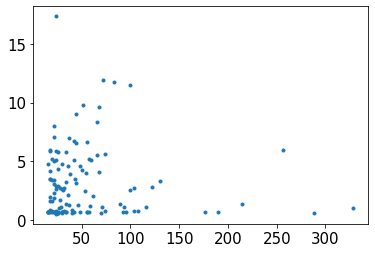

In [25]:
plt.plot(T['BRADY_DURATION_MEDIAN_PR_dyn'],T['BRADY_NUM_PER_HOUR_PR_dyn'],".")

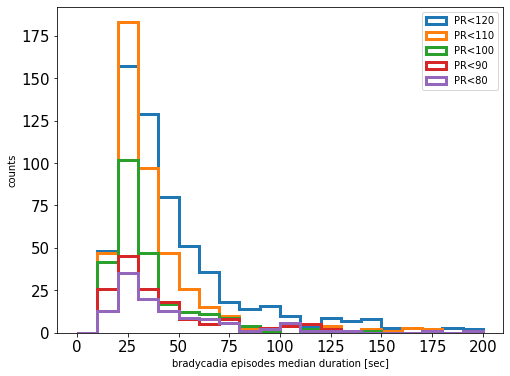

In [26]:
plt.figure(figsize=(8,6))
plt.hist(T['BRADY_DURATION_MEDIAN_PR'].dropna(),range=(0,200)    ,bins=20,histtype='step',lw=3,label='PR<120')
plt.hist(T['BRADY_DURATION_MEDIAN_PR_m10'].dropna(),range=(0,200),bins=20,histtype='step',lw=3,label='PR<110')
plt.hist(T['BRADY_DURATION_MEDIAN_PR_m20'].dropna(),range=(0,200),bins=20,histtype='step',lw=3,label='PR<100')
plt.hist(T['BRADY_DURATION_MEDIAN_PR_m30'].dropna(),range=(0,200),bins=20,histtype='step',lw=3,label='PR<90')
plt.hist(T['BRADY_DURATION_MEDIAN_PR_m40'].dropna(),range=(0,200),bins=20,histtype='step',lw=3,label='PR<80')
plt.xlabel('bradycadia episodes median duration [sec]')
plt.ylabel('counts')
plt.legend()
plt.show()

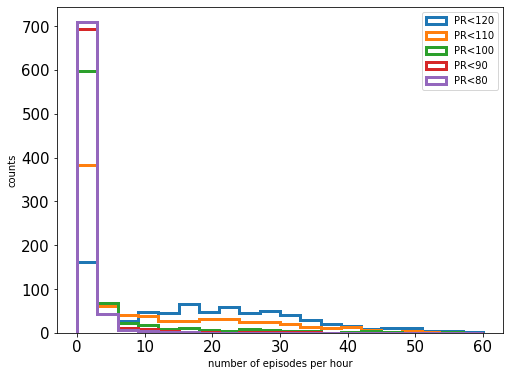

In [27]:
plt.figure(figsize=(8,6))
plt.hist(T['BRADY_NUM_PER_HOUR_PR'].dropna(),    range=(0,60),bins=20,histtype='step',lw=3,label='PR<120')
plt.hist(T['BRADY_NUM_PER_HOUR_PR_m10'].dropna(),range=(0,60),bins=20,histtype='step',lw=3,label='PR<110')
plt.hist(T['BRADY_NUM_PER_HOUR_PR_m20'].dropna(),range=(0,60),bins=20,histtype='step',lw=3,label='PR<100')
plt.hist(T['BRADY_NUM_PER_HOUR_PR_m30'].dropna(),range=(0,60),bins=20,histtype='step',lw=3,label='PR<90')
plt.hist(T['BRADY_NUM_PER_HOUR_PR_m40'].dropna(),range=(0,60),bins=20,histtype='step',lw=3,label='PR<80')
plt.xlabel('number of episodes per hour')
plt.ylabel('counts')
plt.legend()
plt.show()


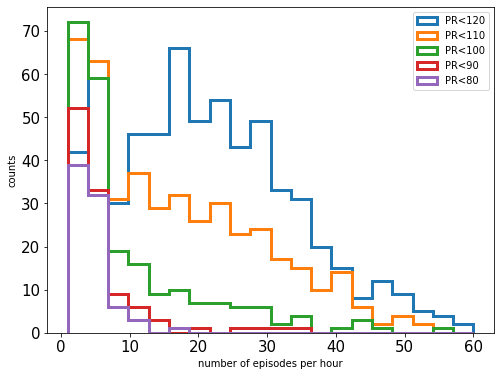

In [28]:
plt.figure(figsize=(8,6))
plt.hist(T['BRADY_NUM_PER_HOUR_PR'].dropna(),    range=(1,60),bins=20,histtype='step',lw=3,label='PR<120')
plt.hist(T['BRADY_NUM_PER_HOUR_PR_m10'].dropna(),range=(1,60),bins=20,histtype='step',lw=3,label='PR<110')
plt.hist(T['BRADY_NUM_PER_HOUR_PR_m20'].dropna(),range=(1,60),bins=20,histtype='step',lw=3,label='PR<100')
plt.hist(T['BRADY_NUM_PER_HOUR_PR_m30'].dropna(),range=(1,60),bins=20,histtype='step',lw=3,label='PR<90')
plt.hist(T['BRADY_NUM_PER_HOUR_PR_m40'].dropna(),range=(1,60),bins=20,histtype='step',lw=3,label='PR<80')
plt.xlabel('number of episodes per hour')
plt.ylabel('counts')
plt.legend()
plt.show()


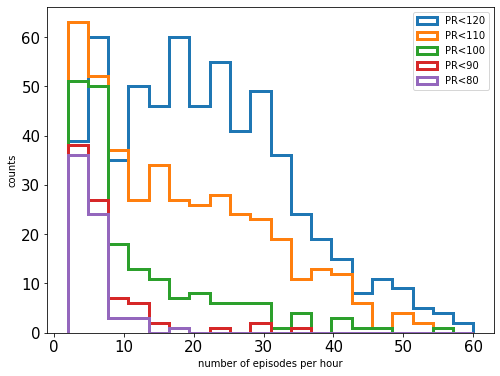

In [29]:
plt.figure(figsize=(8,6))
plt.hist(T['BRADY_NUM_PER_HOUR_PR'].dropna(),    range=(2,60),bins=20,histtype='step',lw=3,label='PR<120')
plt.hist(T['BRADY_NUM_PER_HOUR_PR_m10'].dropna(),range=(2,60),bins=20,histtype='step',lw=3,label='PR<110')
plt.hist(T['BRADY_NUM_PER_HOUR_PR_m20'].dropna(),range=(2,60),bins=20,histtype='step',lw=3,label='PR<100')
plt.hist(T['BRADY_NUM_PER_HOUR_PR_m30'].dropna(),range=(2,60),bins=20,histtype='step',lw=3,label='PR<90')
plt.hist(T['BRADY_NUM_PER_HOUR_PR_m40'].dropna(),range=(2,60),bins=20,histtype='step',lw=3,label='PR<80')
plt.xlabel('number of episodes per hour')
plt.ylabel('counts')
plt.legend()
plt.show()


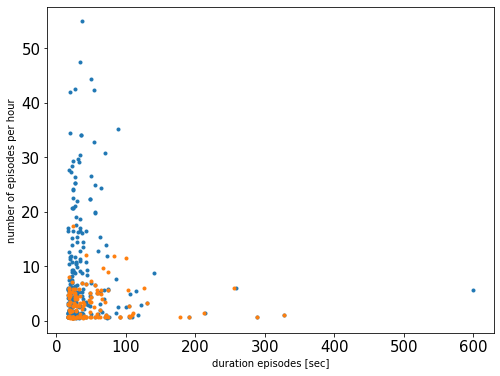

In [30]:
plt.figure(figsize=(8,6))
plt.plot(T['BRADY_DURATION_MEDIAN_PR_m20'],T['BRADY_NUM_PER_HOUR_PR_m20'],".")
plt.plot(T['BRADY_DURATION_MEDIAN_PR_m40'],T['BRADY_NUM_PER_HOUR_PR_m40'],".")

#plt.xlim(10,1000)
plt.xlabel('duration episodes [sec]')
plt.ylabel('number of episodes per hour')
plt.show()

In [31]:
len(T['BRADY_DURATION_MEDIAN_PR_m10'])

764

In [32]:
len(T['BRADY_DURATION_MEDIAN_PR'].dropna())

641

## Duration brady-episodes vs gestational age

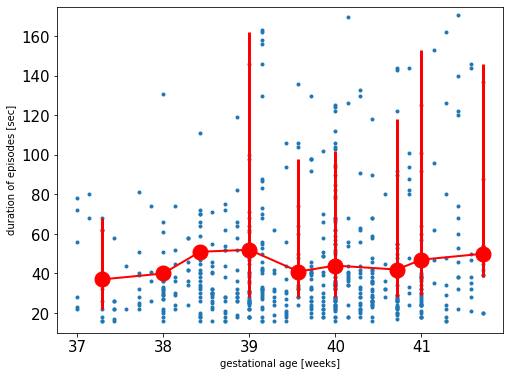

In [33]:
plt.figure(figsize=(8,6))

v1 = T['GEST_AGE_DAYS']/7.
v2 =T['BRADY_DURATION_MEDIAN_PR']

xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,37,42,9)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',zorder=11)
plt.plot(xx,yy,color="red",lw=2,zorder=12)


plt.plot(v1,v2,".")
#plt.ylim(0,1000)
plt.ylim(10,175)
plt.xlabel('gestational age [weeks]')
plt.ylabel('duration of episodes [sec]')
plt.show()

## duration of brady-episodes vs time since birth

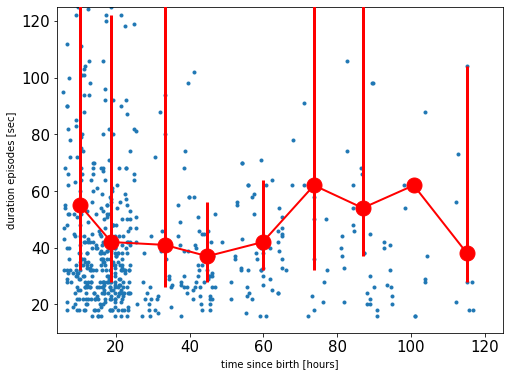

In [34]:
plt.figure(figsize=(8,6))

v1 = T['DELTA_SEC_MEASURE']/60./60.
v2 = T['BRADY_DURATION_MEDIAN_PR']

xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,120,9)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',zorder=11)
plt.plot(xx,yy,color="red",lw=2,zorder=12)


plt.plot(v1,v2,".")
plt.ylim(10,125)
plt.xlim(4,125)
plt.xlabel('time since birth [hours]')
#plt.ylabel('number of episodes per hour')
plt.ylabel('duration episodes [sec]')

plt.show()

## Number brady-episodes vs time since birth

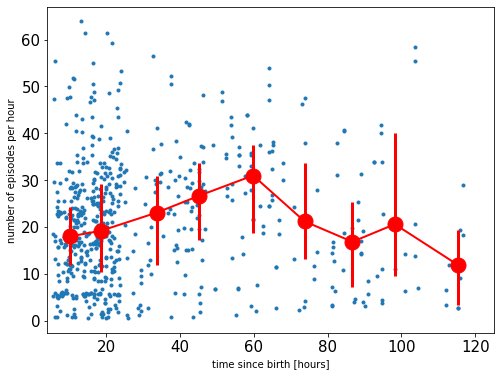

In [35]:
plt.figure(figsize=(8,6))

#v1 = T['DELTA_SEC_MEASURE']/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR']

# Removing zero values as they can drive the median down
v1 = T['DELTA_SEC_MEASURE'][T['BRADY_NUM_PER_HOUR_PR']>0.]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR'][T['BRADY_NUM_PER_HOUR_PR']>0.]

xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,120,9)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',zorder=11)
plt.plot(xx,yy,color="red",lw=2,zorder=12)


plt.plot(v1,v2,".")
#plt.ylim(10,125)
plt.xlim(4,125)
plt.xlabel('time since birth [hours]')
plt.ylabel('number of episodes per hour')

plt.show()




## Number brady-episodes vs time since birth (different thresholds)

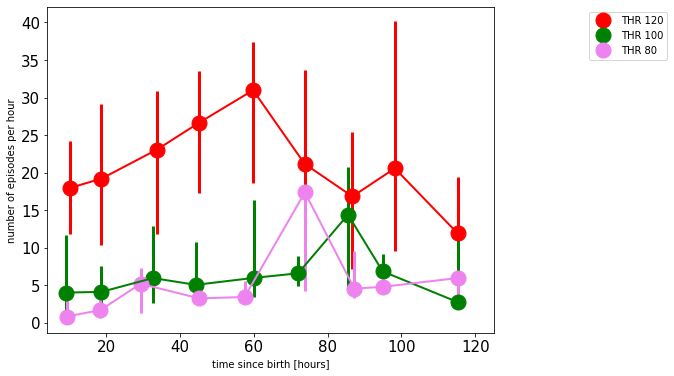

In [36]:
plt.figure(figsize=(8,6))

#v1 = T['DELTA_SEC_MEASURE']/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR']

# Removing zero values as they can drive the median down

# THR 120
v1 = T['DELTA_SEC_MEASURE'][T['BRADY_NUM_PER_HOUR_PR']>0.]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR'][T['BRADY_NUM_PER_HOUR_PR']>0.]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,120,9)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',zorder=11,label='THR 120')
plt.plot(xx,yy,color="red",lw=2,zorder=12)

# THR 110
#v1 = T['DELTA_SEC_MEASURE'][T['BRADY_NUM_PER_HOUR_PR_m10']>0.]/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR_m10'][T['BRADY_NUM_PER_HOUR_PR_m10']>0.]
#xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,120,9)
#plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='blue',zorder=11,label='THR 110')
#plt.plot(xx,yy,color="blue",lw=2,zorder=12)

# THR 100
v1 = T['DELTA_SEC_MEASURE'][T['BRADY_NUM_PER_HOUR_PR_m20']>0.]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR_m20'][T['BRADY_NUM_PER_HOUR_PR_m20']>0.]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,120,9)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='green',zorder=11,label='THR 100')
plt.plot(xx,yy,color="green",lw=2,zorder=12)

# THR 90
#v1 = T['DELTA_SEC_MEASURE'][T['BRADY_NUM_PER_HOUR_PR_m30']>0.]/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR_m30'][T['BRADY_NUM_PER_HOUR_PR_m30']>0.]
#xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,120,9)
#plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',zorder=11,label='THR 90')
#plt.plot(xx,yy,color="orange",lw=2,zorder=12)

# THR 80
v1 = T['DELTA_SEC_MEASURE'][T['BRADY_NUM_PER_HOUR_PR_m40']>0.]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR_m40'][T['BRADY_NUM_PER_HOUR_PR_m40']>0.]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,119,9)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='violet',zorder=11,label='THR 80')
plt.plot(xx,yy,color="violet",lw=2,zorder=12)


#plt.plot(v1,v2,".")
#plt.ylim(10,125)
plt.xlim(4,125)
plt.xlabel('time since birth [hours]')
plt.ylabel('number of episodes per hour')

plt.legend( bbox_to_anchor=(1.4, 1))
plt.show()




## NO PHN 

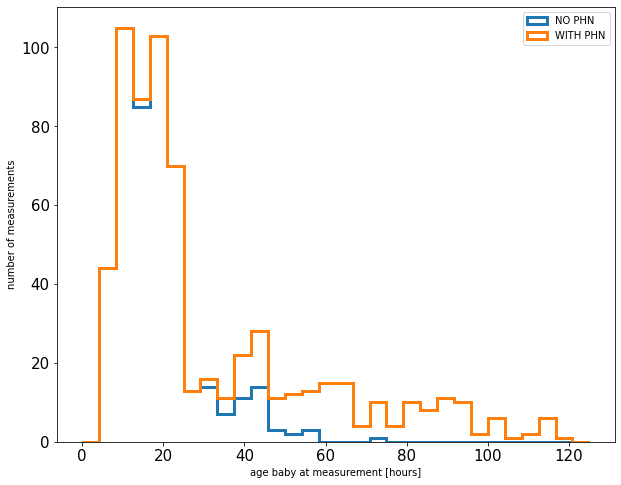

In [37]:
plt.figure(figsize=(10,8))
plt.hist(T['DELTA_SEC_MEASURE'][(T['BRADY_NUM_PER_HOUR_PR']>0.)&(T['PHN']==False)]/60./60.,bins=30,lw=3,histtype='step',label='NO PHN',range=(0,125))
plt.hist(T['DELTA_SEC_MEASURE'][(T['BRADY_NUM_PER_HOUR_PR']>0.)]/60./60.,bins=30,lw=3,histtype='step',label='WITH PHN',range=(0,125))
plt.legend()
plt.xlabel('age baby at measurement [hours]')
plt.ylabel('number of measurements')
plt.show()

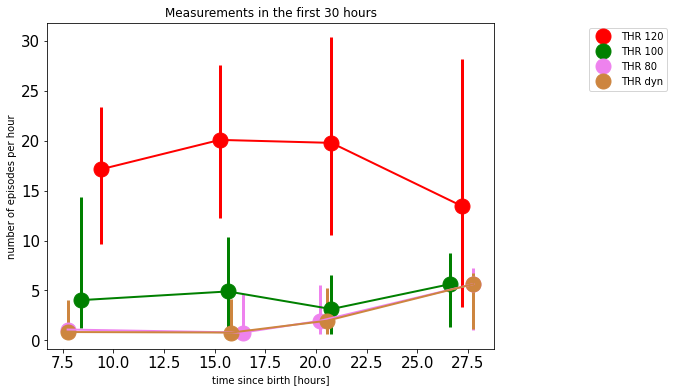

In [38]:
plt.figure(figsize=(8,6))

#v1 = T['DELTA_SEC_MEASURE']/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR']

# Removing zero values as they can drive the median down

# THR 120
v1 = T['DELTA_SEC_MEASURE'][(T['BRADY_NUM_PER_HOUR_PR']>0.)&(T['PHN']==False)]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR'][(T['BRADY_NUM_PER_HOUR_PR']>0.)&(T['PHN']==False)]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6,30,4)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',zorder=11,label='THR 120')
plt.plot(xx,yy,color="red",lw=2,zorder=12)

# THR 110
#v1 = T['DELTA_SEC_MEASURE'][T['BRADY_NUM_PER_HOUR_PR_m10']>0.]/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR_m10'][T['BRADY_NUM_PER_HOUR_PR_m10']>0.]
#xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,120,9)
#plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='blue',zorder=11,label='THR 110')
#plt.plot(xx,yy,color="blue",lw=2,zorder=12)

# THR 100
v1 = T['DELTA_SEC_MEASURE'][(T['BRADY_NUM_PER_HOUR_PR_m20']>0.)&(T['PHN']==False)]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR_m20'][(T['BRADY_NUM_PER_HOUR_PR_m20']>0.)&(T['PHN']==False)]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6,30,4)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='green',zorder=11,label='THR 100')
plt.plot(xx,yy,color="green",lw=2,zorder=12)

# THR 90
#v1 = T['DELTA_SEC_MEASURE'][T['BRADY_NUM_PER_HOUR_PR_m30']>0.]/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR_m30'][T['BRADY_NUM_PER_HOUR_PR_m30']>0.]
#xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,120,9)
#plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',zorder=11,label='THR 90')
#plt.plot(xx,yy,color="orange",lw=2,zorder=12)

# THR 80
v1 = T['DELTA_SEC_MEASURE'][(T['BRADY_NUM_PER_HOUR_PR_m40']>0.)&(T['PHN']==False)]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR_m40'][(T['BRADY_NUM_PER_HOUR_PR_m40']>0.)&(T['PHN']==False)]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6,30,4)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='violet',zorder=11,label='THR 80')
plt.plot(xx,yy,color="violet",lw=2,zorder=12)


# THR 80
v1 = T['DELTA_SEC_MEASURE'][(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)&(T['PHN']==False)]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR_dyn'][(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)&(T['PHN']==False)]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6,30,4)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='peru',zorder=11,label='THR dyn')
plt.plot(xx,yy,color="peru",lw=2,zorder=12)

#plt.plot(v1,v2,".")
#plt.ylim(10,125)
#plt.xlim(4,125)
plt.xlabel('time since birth [hours]')
plt.ylabel('number of episodes per hour')

plt.title('Measurements in the first 30 hours')
plt.legend( bbox_to_anchor=(1.4, 1))
plt.show()




THR 120: BABIES WITH ZERO EPISODES (NO PHN) = 475
THR 100: BABIES WITH ZERO EPISODES (NO PHN) = 183
THR  80: BABIES WITH ZERO EPISODES (NO PHN) = 91
THR dyn: BABIES WITH ZERO EPISODES (NO PHN) = 89


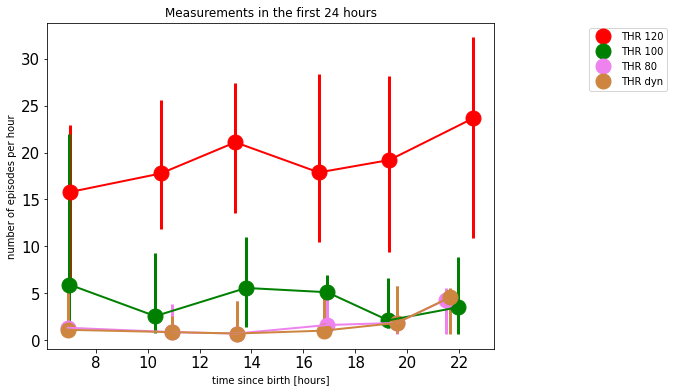

In [39]:
plt.figure(figsize=(8,6))

#v1 = T['DELTA_SEC_MEASURE']/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR']

# Removing zero values as they can drive the median down

# THR 120
num= len(np.where(np.array([(T['BRADY_NUM_PER_HOUR_PR']>0.)&(T['PHN']==False)])==True)[0])
print('THR 120: BABIES WITH ZERO EPISODES (NO PHN) = %i'%num)
v1 = T['DELTA_SEC_MEASURE'][(T['BRADY_NUM_PER_HOUR_PR']>0.)&(T['PHN']==False)]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR'][(T['BRADY_NUM_PER_HOUR_PR']>0.)&(T['PHN']==False)]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6,24,6)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',zorder=11,label='THR 120')
plt.plot(xx,yy,color="red",lw=2,zorder=12)

# THR 110
#v1 = T['DELTA_SEC_MEASURE'][T['BRADY_NUM_PER_HOUR_PR_m10']>0.]/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR_m10'][T['BRADY_NUM_PER_HOUR_PR_m10']>0.]
#xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,120,9)
#plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='blue',zorder=11,label='THR 110')
#plt.plot(xx,yy,color="blue",lw=2,zorder=12)

# THR 100
num= len(np.where(np.array([(T['BRADY_NUM_PER_HOUR_PR_m20']>0.)&(T['PHN']==False)])==True)[0])
print('THR 100: BABIES WITH ZERO EPISODES (NO PHN) = %i'%num)
v1 = T['DELTA_SEC_MEASURE'][(T['BRADY_NUM_PER_HOUR_PR_m20']>0.)&(T['PHN']==False)]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR_m20'][(T['BRADY_NUM_PER_HOUR_PR_m20']>0.)&(T['PHN']==False)]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6,24,6)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='green',zorder=11,label='THR 100')
plt.plot(xx,yy,color="green",lw=2,zorder=12)

# THR 90
#v1 = T['DELTA_SEC_MEASURE'][T['BRADY_NUM_PER_HOUR_PR_m30']>0.]/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR_m30'][T['BRADY_NUM_PER_HOUR_PR_m30']>0.]
#xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,120,9)
#plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',zorder=11,label='THR 90')
#plt.plot(xx,yy,color="orange",lw=2,zorder=12)

# THR 80
num= len(np.where(np.array([(T['BRADY_NUM_PER_HOUR_PR_m40']>0.)&(T['PHN']==False)])==True)[0])
print('THR  80: BABIES WITH ZERO EPISODES (NO PHN) = %i'%num)
v1 = T['DELTA_SEC_MEASURE'][(T['BRADY_NUM_PER_HOUR_PR_m40']>0.)&(T['PHN']==False)]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR_m40'][(T['BRADY_NUM_PER_HOUR_PR_m40']>0.)&(T['PHN']==False)]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6,24,6)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='violet',zorder=11,label='THR 80')
plt.plot(xx,yy,color="violet",lw=2,zorder=12)


# THR dyn
num= len(np.where(np.array([(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)&(T['PHN']==False)])==True)[0])
print('THR dyn: BABIES WITH ZERO EPISODES (NO PHN) = %i'%num)
v1 = T['DELTA_SEC_MEASURE'][(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)&(T['PHN']==False)]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR_dyn'][(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)&(T['PHN']==False)]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6,24,6)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='peru',zorder=11,label='THR dyn')
plt.plot(xx,yy,color="peru",lw=2,zorder=12)

#plt.plot(v1,v2,".")
#plt.ylim(10,125)
#plt.xlim(4,125)
plt.xlabel('time since birth [hours]')
plt.ylabel('number of episodes per hour')
plt.title('Measurements in the first 24 hours')

#plt.ylim(0,7)
plt.legend( bbox_to_anchor=(1.4, 1))
plt.show()




# leaving the zero values in the plot

THR 120: BABIES WITH ZERO EPISODES (NO PHN) = 97
THR 100: BABIES WITH ZERO EPISODES (NO PHN) = 389
THR  80: BABIES WITH ZERO EPISODES (NO PHN) = 481
THR dyn: BABIES WITH ZERO EPISODES (NO PHN) = 483


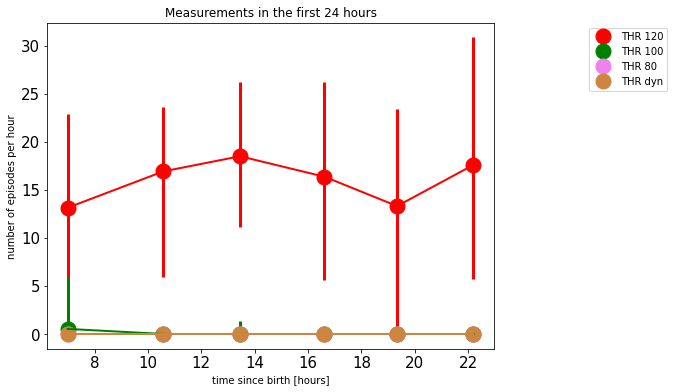

In [40]:
plt.figure(figsize=(8,6))

#v1 = T['DELTA_SEC_MEASURE']/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR']

# Removing zero values as they can drive the median down

# THR 120
num= len(np.where(np.array([(T['BRADY_NUM_PER_HOUR_PR']==0.)&(T['PHN']==False)])==True)[0])
print('THR 120: BABIES WITH ZERO EPISODES (NO PHN) = %i'%num)
v1 = T['DELTA_SEC_MEASURE'][(T['PHN']==False)]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR'][(T['PHN']==False)]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6,24,6)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',zorder=11,label='THR 120')
plt.plot(xx,yy,color="red",lw=2,zorder=12)

# THR 110
#v1 = T['DELTA_SEC_MEASURE'][T['BRADY_NUM_PER_HOUR_PR_m10']>0.]/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR_m10'][T['BRADY_NUM_PER_HOUR_PR_m10']>0.]
#xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,120,9)
#plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='blue',zorder=11,label='THR 110')
#plt.plot(xx,yy,color="blue",lw=2,zorder=12)

# THR 100
num= len(np.where(np.array([(T['BRADY_NUM_PER_HOUR_PR_m20']==0.)&(T['PHN']==False)])==True)[0])
print('THR 100: BABIES WITH ZERO EPISODES (NO PHN) = %i'%num)
v1 = T['DELTA_SEC_MEASURE'][(T['PHN']==False)]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR_m20'][(T['PHN']==False)]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6,24,6)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='green',zorder=11,label='THR 100')
plt.plot(xx,yy,color="green",lw=2,zorder=12)

# THR 90
#v1 = T['DELTA_SEC_MEASURE'][T['BRADY_NUM_PER_HOUR_PR_m30']>0.]/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR_m30'][T['BRADY_NUM_PER_HOUR_PR_m30']>0.]
#xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,120,9)
#plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',zorder=11,label='THR 90')
#plt.plot(xx,yy,color="orange",lw=2,zorder=12)

# THR 80
num= len(np.where(np.array([(T['BRADY_NUM_PER_HOUR_PR_m40']==0.)&(T['PHN']==False)])==True)[0])
print('THR  80: BABIES WITH ZERO EPISODES (NO PHN) = %i'%num)
v1 = T['DELTA_SEC_MEASURE'][(T['PHN']==False)]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR_m40'][(T['PHN']==False)]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6,24,6)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='violet',zorder=11,label='THR 80')
plt.plot(xx,yy,color="violet",lw=2,zorder=12)


# THR dyn
num= len(np.where(np.array([(T['BRADY_NUM_PER_HOUR_PR_dyn']==0.)&(T['PHN']==False)])==True)[0])
print('THR dyn: BABIES WITH ZERO EPISODES (NO PHN) = %i'%num)
v1 = T['DELTA_SEC_MEASURE'][(T['PHN']==False)]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR_dyn'][(T['PHN']==False)]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6,24,6)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='peru',zorder=11,label='THR dyn')
plt.plot(xx,yy,color="peru",lw=2,zorder=12)

#plt.plot(v1,v2,".")
#plt.ylim(10,125)
#plt.xlim(4,125)
plt.xlabel('time since birth [hours]')
plt.ylabel('number of episodes per hour')
plt.title('Measurements in the first 24 hours')

#plt.ylim(-0.5,4)
plt.legend( bbox_to_anchor=(1.4, 1))
plt.show()




## Dynamic threshold

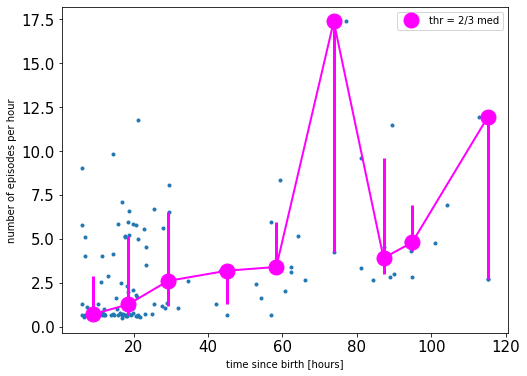

In [41]:
plt.figure(figsize=(8,6))

#v1 = T['DELTA_SEC_MEASURE']/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR']

# Removing zero values as they can drive the median down
v1 = T['DELTA_SEC_MEASURE'][(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR_dyn'][(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)]

xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,119,9)
#xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,30,4)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='magenta',zorder=11,label='thr = 2/3 med')
plt.plot(xx,yy,color="magenta",lw=2,zorder=12)


plt.plot(v1,v2,".")
#plt.ylim(10,125)
#plt.xlim(4,50)
plt.xlabel('time since birth [hours]')
plt.ylabel('number of episodes per hour')

plt.legend()
plt.show()




## NO PHN

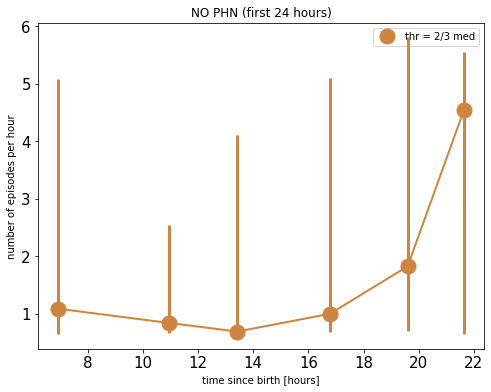

In [42]:
plt.figure(figsize=(8,6))

#v1 = T['DELTA_SEC_MEASURE']/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR']

# Removing zero values as they can drive the median down
v1 = T['DELTA_SEC_MEASURE'][(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)&(T['PHN']==False)]/60./60.
v2 = T['BRADY_NUM_PER_HOUR_PR_dyn'][(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)&(T['PHN']==False)]

#xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,119,9)
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6,24,6)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='peru',zorder=11,label='thr = 2/3 med')
plt.plot(xx,yy,color="peru",lw=2,zorder=12)


#plt.plot(v1,v2,".")
#plt.ylim(10,125)
#plt.xlim(4,50)
plt.xlabel('time since birth [hours]')
plt.ylabel('number of episodes per hour')
plt.title('NO PHN (first 24 hours)')
plt.legend()
plt.show()




In [43]:
# t-test statistics

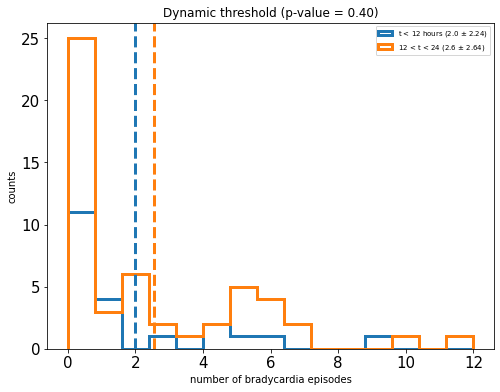

In [44]:
BRA_12 = T['BRADY_NUM_PER_HOUR_PR_dyn'][(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)&
                                       (T['PHN']==False)&
                                       (T['DELTA_SEC_MEASURE']<12.*60.*60)]
BRA_24 = T['BRADY_NUM_PER_HOUR_PR_dyn'][(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)&
                                       (T['PHN']==False)&
                                       (T['DELTA_SEC_MEASURE']>=12.*60.*60)&
                                       (T['DELTA_SEC_MEASURE']<24.*60.*60)]

plt.figure(figsize=(8,6))
m1 = np.mean(BRA_12)
s1 = np.std(BRA_12)
m2 = np.mean(BRA_24)
s2 = np.std(BRA_24)
plt.hist(BRA_12,bins=15,histtype='step',lw=3,range=(0,12),label='t < 12 hours (%.1f $\pm$ %.2f)'%(m1,s1),color='C0')
plt.hist(BRA_24,bins=15,histtype='step',lw=3,range=(0,12),label='12 < t < 24 (%.1f $\pm$ %.2f)'%(m2,s2),color='C1')
plt.axvline(m1,color='C0',ls='dashed',lw=3)
plt.axvline(m2,color='C1',ls='dashed',lw=3)
plt.xlabel('number of bradycardia episodes')
plt.ylabel('counts')
plt.legend(fontsize='x-small')
plt.title('Dynamic threshold (p-value = %.2f)'%ss.ttest_ind(BRA_12,BRA_24)[1])
plt.show()

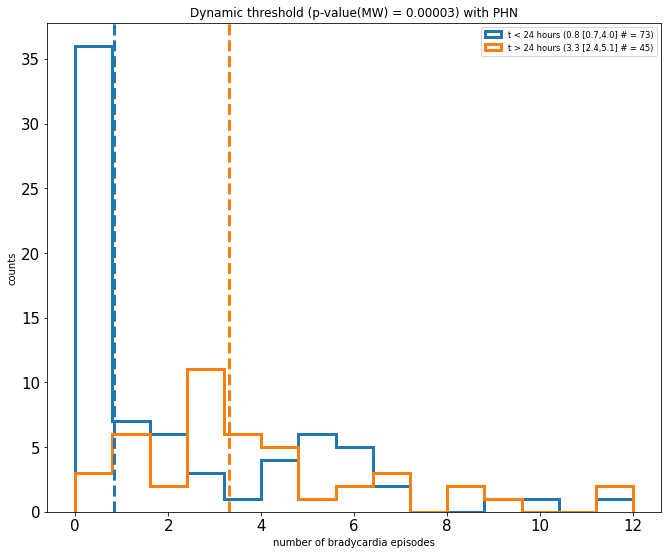

In [45]:
# Check difference 24 hours with PHN

BRA_12 = T['BRADY_NUM_PER_HOUR_PR_dyn'][(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)&
                                       (T['DELTA_SEC_MEASURE']<24.*60.*60)]
BRA_24 = T['BRADY_NUM_PER_HOUR_PR_dyn'][(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)&
                                       (T['DELTA_SEC_MEASURE']>=24.*60.*60)]

plt.figure(figsize=(11,9))
l1 = len(BRA_12)
m1 = np.median(BRA_12)
s1 = np.std(BRA_12)
p1 = np.percentile(BRA_12,q=25)
pp1 = np.percentile(BRA_12,q=75)
l2 = len(BRA_24)
m2 = np.median(BRA_24)
s2 = np.std(BRA_24)
p2 = np.percentile(BRA_24,q=25)
pp2 = np.percentile(BRA_24,q=75)

plt.hist(BRA_12,bins=15,histtype='step',lw=3,range=(0,12),label='t < 24 hours (%.1f [%.1f,%.1f] # = %i)'%(m1,p1,pp1,l1),color='C0')
plt.hist(BRA_24,bins=15,histtype='step',lw=3,range=(0,12),label='t > 24 hours (%.1f [%.1f,%.1f] # = %i)'%(m2,p2,pp2,l2),color='C1')
plt.axvline(m1,color='C0',ls='dashed',lw=3)
plt.axvline(m2,color='C1',ls='dashed',lw=3)
plt.xlabel('number of bradycardia episodes')
plt.ylabel('counts')
plt.legend(fontsize='small')
#plt.title('Dynamic threshold (p-value = %.2f)'%ss.ttest_ind(BRA_12,BRA_24)[1])
plt.title('Dynamic threshold (p-value(MW) = %.5f) with PHN'%ss.mannwhitneyu(BRA_12,BRA_24)[1])

plt.show()

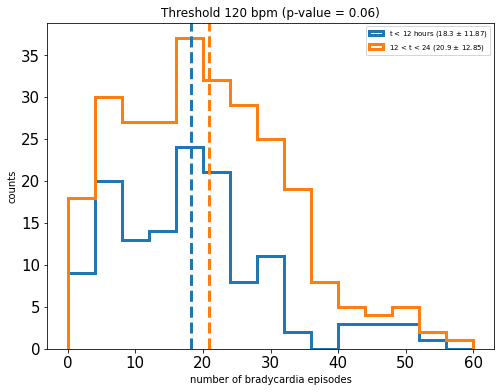

In [46]:
BRA_12 = T['BRADY_NUM_PER_HOUR_PR'][(T['BRADY_NUM_PER_HOUR_PR']>0.)&
                                       (T['PHN']==False)&
                                       (T['DELTA_SEC_MEASURE']<12.*60.*60)]
BRA_24 = T['BRADY_NUM_PER_HOUR_PR'][(T['BRADY_NUM_PER_HOUR_PR']>0.)&
                                       (T['PHN']==False)&
                                       (T['DELTA_SEC_MEASURE']>=12.*60.*60)&
                                       (T['DELTA_SEC_MEASURE']<24.*60.*60)]

plt.figure(figsize=(8,6))
m1 = np.mean(BRA_12)
s1 = np.std(BRA_12)
m2 = np.mean(BRA_24)
s2 = np.std(BRA_24)
plt.hist(BRA_12,bins=15,histtype='step',lw=3,range=(0,60),label='t < 12 hours (%.1f $\pm$ %.2f)'%(m1,s1),color='C0')
plt.hist(BRA_24,bins=15,histtype='step',lw=3,range=(0,60),label='12 < t < 24 (%.1f $\pm$ %.2f)'%(m2,s2),color='C1')
plt.axvline(m1,color='C0',ls='dashed',lw=3)
plt.axvline(m2,color='C1',ls='dashed',lw=3)
plt.xlabel('number of bradycardia episodes')
plt.ylabel('counts')
plt.legend(fontsize='x-small')
plt.title('Threshold 120 bpm (p-value = %.2f)'%ss.ttest_ind(BRA_12,BRA_24)[1])
plt.show()

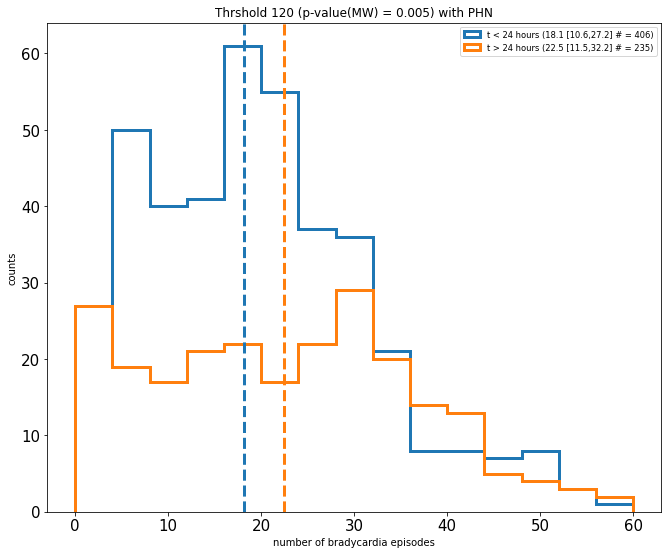

In [47]:
# Check difference 24 hours with PHN

BRA_12 = T['BRADY_NUM_PER_HOUR_PR'][(T['BRADY_NUM_PER_HOUR_PR']>0.)&
                                       (T['DELTA_SEC_MEASURE']<24.*60.*60)]
BRA_24 = T['BRADY_NUM_PER_HOUR_PR'][(T['BRADY_NUM_PER_HOUR_PR']>0.)&
                                       (T['DELTA_SEC_MEASURE']>=24.*60.*60)]

plt.figure(figsize=(11,9))
l1 = len(BRA_12)
m1 = np.median(BRA_12)
s1 = np.std(BRA_12)
p1 = np.percentile(BRA_12,q=25)
pp1 = np.percentile(BRA_12,q=75)
l2 = len(BRA_24)
m2 = np.median(BRA_24)
s2 = np.std(BRA_24)
p2 = np.percentile(BRA_24,q=25)
pp2 = np.percentile(BRA_24,q=75)

plt.hist(BRA_12,bins=15,histtype='step',lw=3,range=(0,60),label='t < 24 hours (%.1f [%.1f,%.1f] # = %i)'%(m1,p1,pp1,l1),color='C0')
plt.hist(BRA_24,bins=15,histtype='step',lw=3,range=(0,60),label='t > 24 hours (%.1f [%.1f,%.1f] # = %i)'%(m2,p2,pp2,l2),color='C1')
plt.axvline(m1,color='C0',ls='dashed',lw=3)
plt.axvline(m2,color='C1',ls='dashed',lw=3)
plt.xlabel('number of bradycardia episodes')
plt.ylabel('counts')
plt.legend(fontsize='small')
#plt.title('Dynamic threshold (p-value = %.2f)'%ss.ttest_ind(BRA_12,BRA_24)[1])
plt.title('Thrshold 120 (p-value(MW) = %.3f) with PHN'%ss.mannwhitneyu(BRA_12,BRA_24)[1])

plt.show()

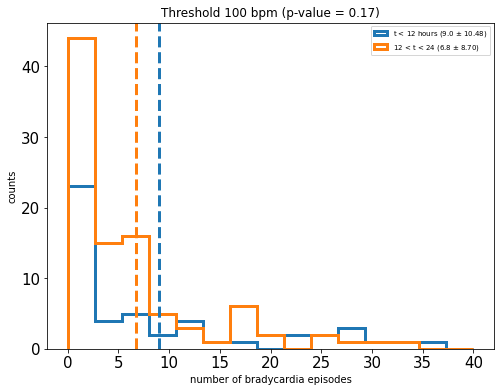

In [48]:
BRA_12 = T['BRADY_NUM_PER_HOUR_PR_m20'][(T['BRADY_NUM_PER_HOUR_PR_m20']>0.)&
                                       (T['PHN']==False)&
                                       (T['DELTA_SEC_MEASURE']<12.*60.*60)]
BRA_24 = T['BRADY_NUM_PER_HOUR_PR_m20'][(T['BRADY_NUM_PER_HOUR_PR_m20']>0.)&
                                       (T['PHN']==False)&
                                       (T['DELTA_SEC_MEASURE']>=12.*60.*60)&
                                       (T['DELTA_SEC_MEASURE']<24.*60.*60)]

plt.figure(figsize=(8,6))
m1 = np.mean(BRA_12)
s1 = np.std(BRA_12)
m2 = np.mean(BRA_24)
s2 = np.std(BRA_24)
plt.hist(BRA_12,bins=15,histtype='step',lw=3,label='t < 12 hours (%.1f $\pm$ %.2f)'%(m1,s1),color='C0',range=(0,40))
plt.hist(BRA_24,bins=15,histtype='step',lw=3,label='12 < t < 24 (%.1f $\pm$ %.2f)'%(m2,s2),color='C1' ,range=(0,40))
plt.axvline(m1,color='C0',ls='dashed',lw=3)
plt.axvline(m2,color='C1',ls='dashed',lw=3)
plt.xlabel('number of bradycardia episodes')
plt.ylabel('counts')
plt.legend(fontsize='x-small')
plt.title('Threshold 100 bpm (p-value = %.2f)'%ss.ttest_ind(BRA_12,BRA_24)[1])
plt.show()

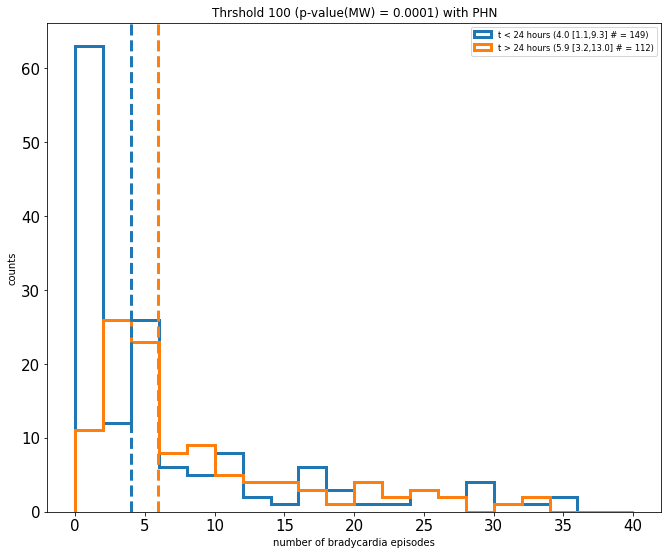

In [49]:
# Check difference 24 hours with PHN

BRA_12 = T['BRADY_NUM_PER_HOUR_PR_m20'][(T['BRADY_NUM_PER_HOUR_PR_m20']>0.)&
                                       (T['DELTA_SEC_MEASURE']<24.*60.*60)]
BRA_24 = T['BRADY_NUM_PER_HOUR_PR_m20'][(T['BRADY_NUM_PER_HOUR_PR_m20']>0.)&
                                       (T['DELTA_SEC_MEASURE']>=24.*60.*60)]

plt.figure(figsize=(11,9))
l1 = len(BRA_12)
m1 = np.median(BRA_12)
s1 = np.std(BRA_12)
p1 = np.percentile(BRA_12,q=25)
pp1 = np.percentile(BRA_12,q=75)
l2 = len(BRA_24)
m2 = np.median(BRA_24)
s2 = np.std(BRA_24)
p2 = np.percentile(BRA_24,q=25)
pp2 = np.percentile(BRA_24,q=75)

plt.hist(BRA_12,bins=20,histtype='step',lw=3,range=(0,40),label='t < 24 hours (%.1f [%.1f,%.1f] # = %i)'%(m1,p1,pp1,l1),color='C0')
plt.hist(BRA_24,bins=20,histtype='step',lw=3,range=(0,40),label='t > 24 hours (%.1f [%.1f,%.1f] # = %i)'%(m2,p2,pp2,l2),color='C1')
plt.axvline(m1,color='C0',ls='dashed',lw=3)
plt.axvline(m2,color='C1',ls='dashed',lw=3)
plt.xlabel('number of bradycardia episodes')
plt.ylabel('counts')
plt.legend(fontsize='small')
#plt.title('Dynamic threshold (p-value = %.2f)'%ss.ttest_ind(BRA_12,BRA_24)[1])
plt.title('Thrshold 100 (p-value(MW) = %.4f) with PHN'%ss.mannwhitneyu(BRA_12,BRA_24)[1])

plt.show()

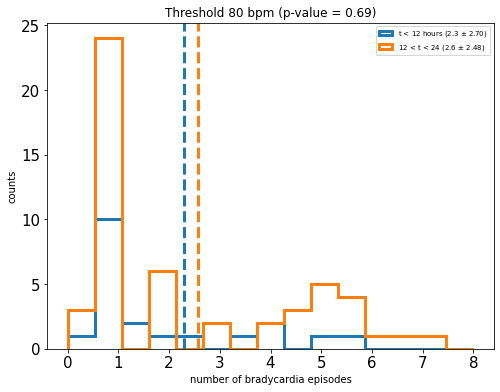

In [50]:
BRA_12 = T['BRADY_NUM_PER_HOUR_PR_m40'][(T['BRADY_NUM_PER_HOUR_PR_m40']>0.)&
                                       (T['PHN']==False)&
                                       (T['DELTA_SEC_MEASURE']<12.*60.*60)]
BRA_24 = T['BRADY_NUM_PER_HOUR_PR_m40'][(T['BRADY_NUM_PER_HOUR_PR_m40']>0.)&
                                       (T['PHN']==False)&
                                       (T['DELTA_SEC_MEASURE']>=12.*60.*60)&
                                       (T['DELTA_SEC_MEASURE']<24.*60.*60)]

plt.figure(figsize=(8,6))
m1 = np.mean(BRA_12)
s1 = np.std(BRA_12)
m2 = np.mean(BRA_24)
s2 = np.std(BRA_24)
plt.hist(BRA_12,bins=15,histtype='step',lw=3,label='t < 12 hours (%.1f $\pm$ %.2f)'%(m1,s1),color='C0',range=(0,8))
plt.hist(BRA_24,bins=15,histtype='step',lw=3,label='12 < t < 24 (%.1f $\pm$ %.2f)'%(m2,s2),color='C1' ,range=(0,8))
plt.axvline(m1,color='C0',ls='dashed',lw=3)
plt.axvline(m2,color='C1',ls='dashed',lw=3)
plt.xlabel('number of bradycardia episodes')
plt.ylabel('counts')
plt.legend(fontsize='x-small')
plt.title('Threshold 80 bpm (p-value = %.2f)'%ss.ttest_ind(BRA_12,BRA_24)[1])
plt.show()

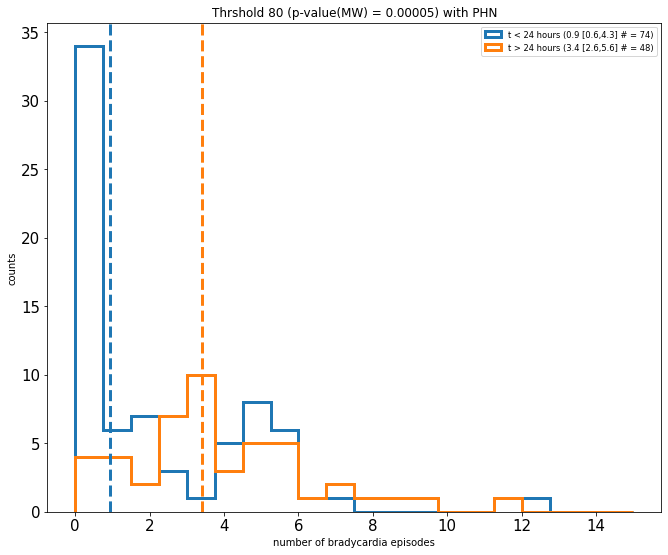

In [51]:
# Check difference 24 hours with PHN

BRA_12 = T['BRADY_NUM_PER_HOUR_PR_m40'][(T['BRADY_NUM_PER_HOUR_PR_m40']>0.)&
                                       (T['DELTA_SEC_MEASURE']<24.*60.*60)]
BRA_24 = T['BRADY_NUM_PER_HOUR_PR_m40'][(T['BRADY_NUM_PER_HOUR_PR_m40']>0.)&
                                       (T['DELTA_SEC_MEASURE']>=24.*60.*60)]

plt.figure(figsize=(11,9))
l1 = len(BRA_12)
m1 = np.median(BRA_12)
s1 = np.std(BRA_12)
p1 = np.percentile(BRA_12,q=25)
pp1 = np.percentile(BRA_12,q=75)
l2 = len(BRA_24)
m2 = np.median(BRA_24)
s2 = np.std(BRA_24)
p2 = np.percentile(BRA_24,q=25)
pp2 = np.percentile(BRA_24,q=75)

plt.hist(BRA_12,bins=20,histtype='step',lw=3,range=(0,15),label='t < 24 hours (%.1f [%.1f,%.1f] # = %i)'%(m1,p1,pp1,l1),color='C0')
plt.hist(BRA_24,bins=20,histtype='step',lw=3,range=(0,15),label='t > 24 hours (%.1f [%.1f,%.1f] # = %i)'%(m2,p2,pp2,l2),color='C1')
plt.axvline(m1,color='C0',ls='dashed',lw=3)
plt.axvline(m2,color='C1',ls='dashed',lw=3)
plt.xlabel('number of bradycardia episodes')
plt.ylabel('counts')
plt.legend(fontsize='small')
#plt.title('Dynamic threshold (p-value = %.2f)'%ss.ttest_ind(BRA_12,BRA_24)[1])
plt.title('Thrshold 80 (p-value(MW) = %.5f) with PHN'%ss.mannwhitneyu(BRA_12,BRA_24)[1])

plt.show()

# Number of episodes per gestational age

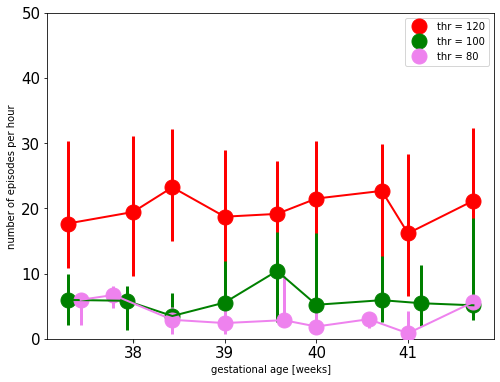

In [52]:
plt.figure(figsize=(8,6))

#v1 = T['DELTA_SEC_MEASURE']/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR']

# Removing zero values as they can drive the median down
v1 = T['GEST_AGE_DAYS'][T['BRADY_NUM_PER_HOUR_PR']>0.]/7.
v2 = T['BRADY_NUM_PER_HOUR_PR'][T['BRADY_NUM_PER_HOUR_PR']>0.]

xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,37,42,9)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',zorder=11,label='thr = 120')
plt.plot(xx,yy,color="red",lw=2,zorder=12)

v1 = T['GEST_AGE_DAYS'][T['BRADY_NUM_PER_HOUR_PR_m20']>0.]/7.
v2 = T['BRADY_NUM_PER_HOUR_PR_m20'][T['BRADY_NUM_PER_HOUR_PR_m20']>0.]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,37,42,9)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='green',zorder=11,label='thr = 100')
plt.plot(xx,yy,color="green",lw=2,zorder=12)


v1 = T['GEST_AGE_DAYS'][T['BRADY_NUM_PER_HOUR_PR_m40']>0.]/7.
v2 = T['BRADY_NUM_PER_HOUR_PR_m40'][T['BRADY_NUM_PER_HOUR_PR_m40']>0.]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,37,42,9)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='violet',zorder=11,label='thr = 80')
plt.plot(xx,yy,color="violet",lw=2,zorder=12)


#plt.plot(v1,v2,".")
plt.ylim(0,50)
#plt.xlim(4,125)
plt.xlabel('gestational age [weeks]')
plt.ylabel('number of episodes per hour')

plt.legend()
plt.show()




## No PHN

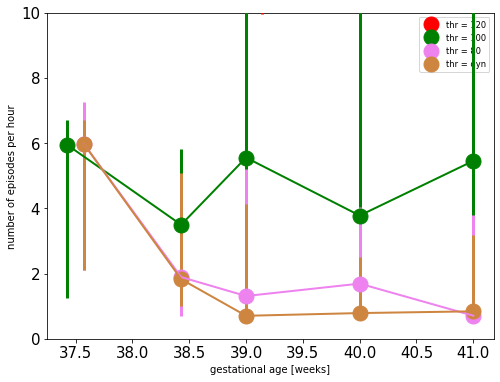

In [53]:
plt.figure(figsize=(8,6))

#v1 = T['DELTA_SEC_MEASURE']/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR']

# Removing zero values as they can drive the median down
v1 = T['GEST_AGE_DAYS'][(T['BRADY_NUM_PER_HOUR_PR']>0.)&(T['PHN']==False)]/7.
v2 = T['BRADY_NUM_PER_HOUR_PR'][(T['BRADY_NUM_PER_HOUR_PR']>0.)&(T['PHN']==False)]
#plt.plot(v1,v2,"b.")
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,37,41.5,5)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',zorder=11,label='thr = 120')
plt.plot(xx,yy,color="red",lw=2,zorder=12)


v1 = T['GEST_AGE_DAYS'][(T['BRADY_NUM_PER_HOUR_PR_m20']>0.)&(T['PHN']==False)]/7.
v2 = T['BRADY_NUM_PER_HOUR_PR_m20'][(T['BRADY_NUM_PER_HOUR_PR_m20']>0.)&(T['PHN']==False)]
#plt.plot(v1,v2,"b.")
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,37,41.5,5)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='green',zorder=11,label='thr = 100')
plt.plot(xx,yy,color="green",lw=2,zorder=12)


v1 = T['GEST_AGE_DAYS'][(T['BRADY_NUM_PER_HOUR_PR_m40']>0.)&(T['PHN']==False)]/7.
v2 = T['BRADY_NUM_PER_HOUR_PR_m40'][(T['BRADY_NUM_PER_HOUR_PR_m40']>0.)&(T['PHN']==False)]
#plt.plot(v1,v2,"b.")
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,37,41.5,5)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='violet',zorder=11,label='thr = 80')
plt.plot(xx,yy,color="violet",lw=2,zorder=12)

v1 = T['GEST_AGE_DAYS'][(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)&(T['PHN']==False)]/7.
v2 = T['BRADY_NUM_PER_HOUR_PR_dyn'][(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)&(T['PHN']==False)]
#plt.plot(v1,v2,"b.")
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,37,41.5,5)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='peru',zorder=11,label='thr = dyn')
plt.plot(xx,yy,color="peru",lw=2,zorder=12)



#plt.plot(v1,v2,".")
#plt.ylim(0,50)
plt.ylim(0,10)

#plt.xlim(4,125)
plt.xlabel('gestational age [weeks]')
plt.ylabel('number of episodes per hour')

plt.legend(fontsize='small')
plt.show()




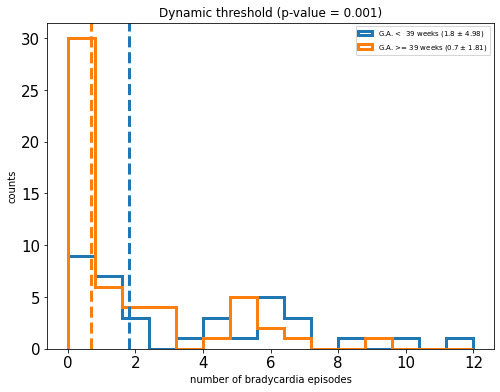

In [54]:
BRA_12 = T['BRADY_NUM_PER_HOUR_PR_dyn'][(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)&
                                       (T['PHN']==False)&
                                       (T['GEST_AGE_DAYS']<39*7)]
BRA_24 = T['BRADY_NUM_PER_HOUR_PR_dyn'][(T['BRADY_NUM_PER_HOUR_PR_dyn']>0.)&
                                       (T['PHN']==False)&
                                       (T['GEST_AGE_DAYS']>=39*7)]

plt.figure(figsize=(8,6))
m1 = np.median(BRA_12)
s1 = ss.iqr(BRA_12)
m2 = np.median(BRA_24)
s2 = ss.iqr(BRA_24)
plt.hist(BRA_12,bins=15,histtype='step',lw=3,label='G.A. <  39 weeks (%.1f $\pm$ %.2f)'%(m1,s1),color='C0',range=(0,12))
plt.hist(BRA_24,bins=15,histtype='step',lw=3,label='G.A. >= 39 weeks (%.1f $\pm$ %.2f)'%(m2,s2),color='C1',range=(0,12))
plt.axvline(m1,color='C0',ls='dashed',lw=3)
plt.axvline(m2,color='C1',ls='dashed',lw=3)
plt.xlabel('number of bradycardia episodes')
plt.ylabel('counts')
plt.legend(fontsize='x-small')

ss.mannwhitneyu(BRA_12,BRA_24)
#plt.title('Dynamic threshold (p-value = %.3f)'%ss.ttest_ind(BRA_12,BRA_24)[1])
plt.title('Dynamic threshold (p-value = %.3f)'%ss.mannwhitneyu(BRA_12,BRA_24)[1])

plt.show()

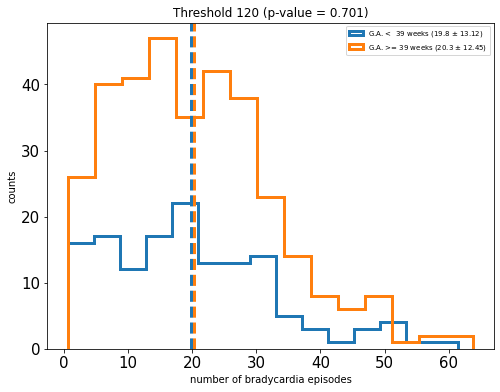

In [55]:
BRA_12 = T['BRADY_NUM_PER_HOUR_PR'][(T['BRADY_NUM_PER_HOUR_PR']>0.)&
                                       (T['PHN']==False)&
                                       (T['GEST_AGE_DAYS']<39*7)]
BRA_24 = T['BRADY_NUM_PER_HOUR_PR'][(T['BRADY_NUM_PER_HOUR_PR']>0.)&
                                       (T['PHN']==False)&
                                       (T['GEST_AGE_DAYS']>=39*7)]

plt.figure(figsize=(8,6))
m1 = np.mean(BRA_12)
s1 = np.std(BRA_12)
m2 = np.mean(BRA_24)
s2 = np.std(BRA_24)
plt.hist(BRA_12,bins=15,histtype='step',lw=3,label='G.A. <  39 weeks (%.1f $\pm$ %.2f)'%(m1,s1),color='C0')#,range=(0,12))
plt.hist(BRA_24,bins=15,histtype='step',lw=3,label='G.A. >= 39 weeks (%.1f $\pm$ %.2f)'%(m2,s2),color='C1')#,range=(0,12))
plt.axvline(m1,color='C0',ls='dashed',lw=3)
plt.axvline(m2,color='C1',ls='dashed',lw=3)
plt.xlabel('number of bradycardia episodes')
plt.ylabel('counts')
plt.legend(fontsize='x-small')
plt.title('Threshold 120 (p-value = %.3f)'%ss.ttest_ind(BRA_12,BRA_24)[1])
plt.show()

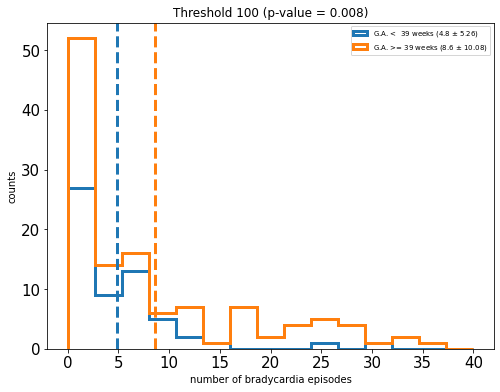

In [56]:
BRA_12 = T['BRADY_NUM_PER_HOUR_PR_m20'][(T['BRADY_NUM_PER_HOUR_PR_m20']>0.)&
                                       (T['PHN']==False)&
                                       (T['GEST_AGE_DAYS']<39*7)]
BRA_24 = T['BRADY_NUM_PER_HOUR_PR_m20'][(T['BRADY_NUM_PER_HOUR_PR_m20']>0.)&
                                       (T['PHN']==False)&
                                       (T['GEST_AGE_DAYS']>=39*7)]

plt.figure(figsize=(8,6))
m1 = np.mean(BRA_12)
s1 = np.std(BRA_12)
m2 = np.mean(BRA_24)
s2 = np.std(BRA_24)
plt.hist(BRA_12,bins=15,histtype='step',lw=3,label='G.A. <  39 weeks (%.1f $\pm$ %.2f)'%(m1,s1),color='C0',range=(0,40))
plt.hist(BRA_24,bins=15,histtype='step',lw=3,label='G.A. >= 39 weeks (%.1f $\pm$ %.2f)'%(m2,s2),color='C1',range=(0,40))
plt.axvline(m1,color='C0',ls='dashed',lw=3)
plt.axvline(m2,color='C1',ls='dashed',lw=3)
plt.xlabel('number of bradycardia episodes')
plt.ylabel('counts')
plt.legend(fontsize='x-small')
plt.title('Threshold 100 (p-value = %.3f)'%ss.ttest_ind(BRA_12,BRA_24)[1])
plt.show()

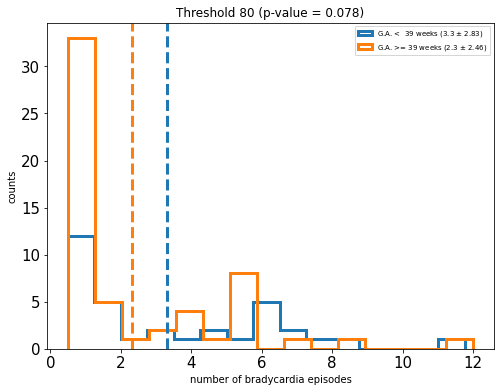

In [57]:
BRA_12 = T['BRADY_NUM_PER_HOUR_PR_m40'][(T['BRADY_NUM_PER_HOUR_PR_m40']>0.)&
                                       (T['PHN']==False)&
                                       (T['GEST_AGE_DAYS']<39*7)]
BRA_24 = T['BRADY_NUM_PER_HOUR_PR_m40'][(T['BRADY_NUM_PER_HOUR_PR_m40']>0.)&
                                       (T['PHN']==False)&
                                       (T['GEST_AGE_DAYS']>=39*7)]

plt.figure(figsize=(8,6))
m1 = np.mean(BRA_12)
s1 = np.std(BRA_12)
m2 = np.mean(BRA_24)
s2 = np.std(BRA_24)
plt.hist(BRA_12,bins=15,histtype='step',lw=3,label='G.A. <  39 weeks (%.1f $\pm$ %.2f)'%(m1,s1),color='C0')#,range=(0,40))
plt.hist(BRA_24,bins=15,histtype='step',lw=3,label='G.A. >= 39 weeks (%.1f $\pm$ %.2f)'%(m2,s2),color='C1')#,range=(0,40))
plt.axvline(m1,color='C0',ls='dashed',lw=3)
plt.axvline(m2,color='C1',ls='dashed',lw=3)
plt.xlabel('number of bradycardia episodes')
plt.ylabel('counts')
plt.legend(fontsize='x-small')
plt.title('Threshold 80 (p-value = %.3f)'%ss.ttest_ind(BRA_12,BRA_24)[1])
plt.show()

# Number vs duration

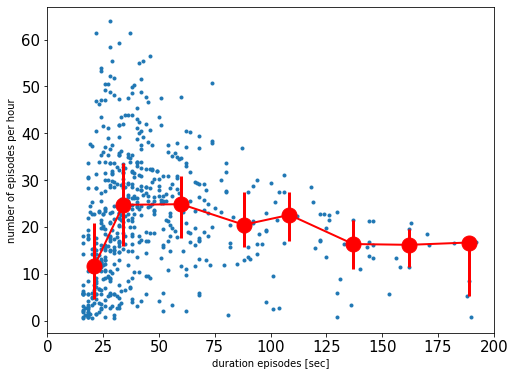

In [58]:
plt.figure(figsize=(8,6))

#v1 = T['DELTA_SEC_MEASURE']/60./60.
#v2 = T['BRADY_NUM_PER_HOUR_PR']

# Removing zero values as they can drive the median down
v1 = T['BRADY_DURATION_MEDIAN_PR'][T['BRADY_NUM_PER_HOUR_PR']>0.]
v2 = T['BRADY_NUM_PER_HOUR_PR'][T['BRADY_NUM_PER_HOUR_PR']>0.]
xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,0,200,8)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',zorder=11,label='thr = 120')
plt.plot(xx,yy,color="red",lw=2,zorder=12)


#v1 = T['BRADY_DURATION_MEDIAN_PR_m20'][T['BRADY_NUM_PER_HOUR_PR_m20']>0.]
#v2 = T['BRADY_NUM_PER_HOUR_PR_m20'][T['BRADY_NUM_PER_HOUR_PR_m20']>0.]
#xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,20,75,6)
#plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='blue',zorder=11,label='thr = 100')
#plt.plot(xx,yy,color="blue",lw=2,zorder=12)


plt.plot(v1,v2,".")
#plt.ylim(10,125)
plt.xlim(0,200)
plt.xlabel('duration episodes [sec]')
plt.ylabel('number of episodes per hour')

#plt.legend()
plt.show()




# PR vs time (coloured by dangerous values) 

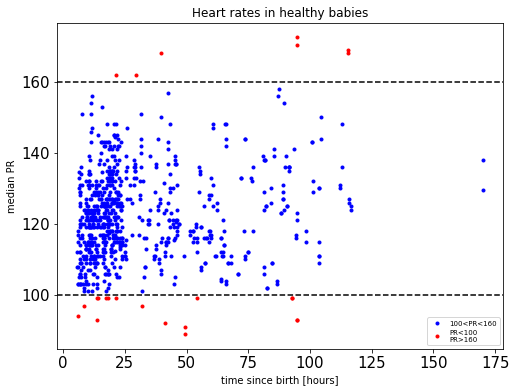

In [59]:
plt.figure(figsize=(8,6))

v1 = T['DELTA_SEC_MEASURE']/60./60.
v2 = T['MED_PR']


plt.plot(v1[(v2<160)&(v2>100)],v2[(v2<160)&(v2>100)],".b",label='100<PR<160')
plt.plot(v1[(v2>=160)|(v2<=100)],v2[(v2>=160)|(v2<=100)],".r",label='PR<100\nPR>160')

plt.axhline(100,ls='dashed',color='k')
plt.axhline(160,ls='dashed',color='k')

#plt.xlim(10,1000)
plt.xlabel('time since birth [hours]')
plt.ylabel('median PR')
plt.legend(loc=4,fontsize='x-small')
plt.title('Heart rates in healthy babies')
plt.show()

## No PHN

Total number of measurements:  572
Measurements with 100 < PR < 160:  559
Measurenment with PR <= 100:  10
Measurenment with PR >= 160:  3


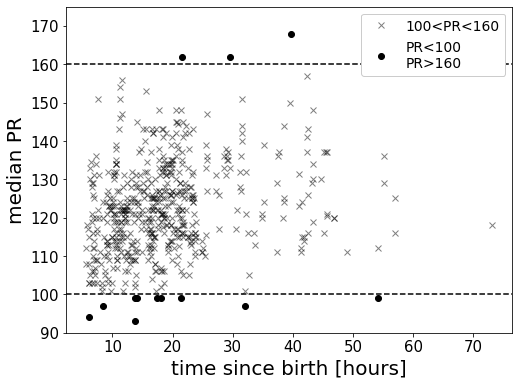

In [83]:
plt.figure(figsize=(8,6))

v1 = T['DELTA_SEC_MEASURE'][T['PHN']==False]/60./60.
v2 = T['MED_PR'][T['PHN']==False]


plt.plot(v1[(v2<160)&(v2>100)],v2[(v2<160)&(v2>100)],"xk",label='100<PR<160',alpha=0.5)
plt.plot(v1[(v2>=160)|(v2<=100)],v2[(v2>=160)|(v2<=100)],"ok",label='PR<100\nPR>160')

plt.axhline(100,ls='dashed',color='k')
plt.axhline(160,ls='dashed',color='k')

print('Total number of measurements: ',len(v2))
print('Measurements with 100 < PR < 160: ',len(v1[(v2<160)&(v2>100)]))
print('Measurenment with PR <= 100: ', len(v2[v2<=100]))
print('Measurenment with PR >= 160: ', len(v2[v2>=160]))



#plt.xlim(10,1000)
plt.ylim(90,175)
plt.xlabel('time since birth [hours]')
plt.ylabel('median PR')
plt.legend(loc=1,fontsize='x-small',framealpha=1,fancybox=True)
#plt.title('Heart rates in healthy babies')
plt.show()

In [72]:
T['BABY_IDS'][((T['PHN']==False) & (T['DELTA_SEC_MEASURE']/60./60.>50)&(T['MED_PR']<100))]

434    PLC 028
Name: BABY_IDS, dtype: object

In [70]:
T['BABY_IDS'][((T['PHN']==False) & (T['MED_PR']<100))]

49      FMC013
133     FMC030
280     RGH010
350     FMC072
351     FMC072
434    PLC 028
639     FMC133
679     PLC044
690    PLC 049
693    PLC 049
Name: BABY_IDS, dtype: object

In [63]:
fmc013 = baby('FMC013')

In [67]:
fmc013.measurements_delta_sec_since_birth[0]/60./60.

14.136388888888888

G_FMC013_Day1_Lt foot.csv


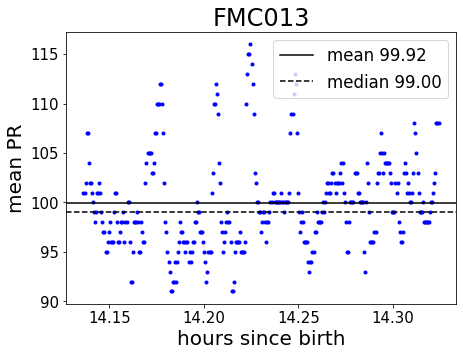

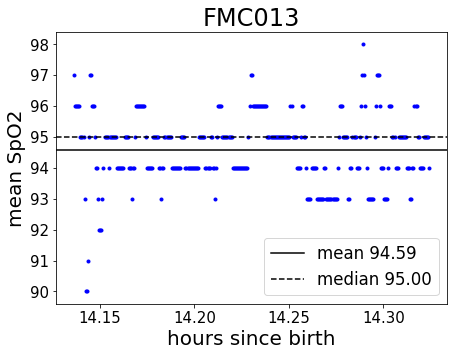

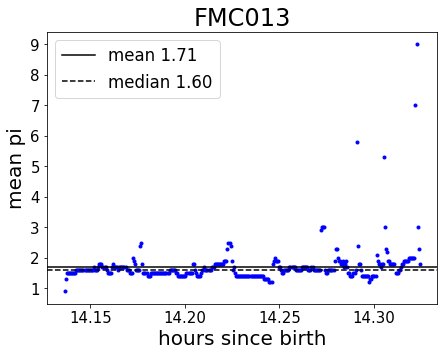

In [84]:
fmc013.plot_baby_measurements(0)

In [73]:
PLC028 = baby('PLC028')

In [74]:
PLC028.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC028/G_PLC028_Day1_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC028/G_PLC028_Day1_Rt Wrist.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC028/G_PLC028_Day2_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC028/G_PLC028_Day2_Rt Wrist.csv']

G_PLC028_Day1_Rt Foot.csv


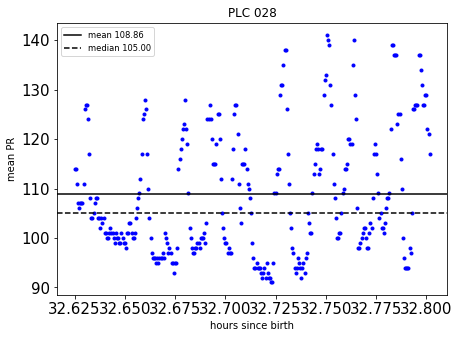

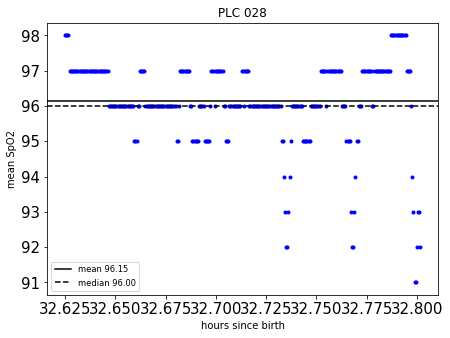

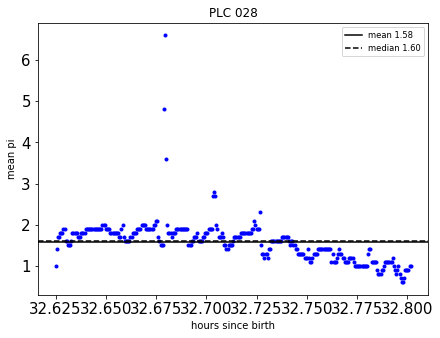

In [81]:
PLC028.plot_baby_measurements(0)

In [78]:
np.array(PLC028.measurements_delta_sec_since_birth)/60./60.

array([32.625     , 32.59916667, 54.16527778, 54.12777778])

In [61]:
T['BABY_IDS'][T['BRADY_DURATION_MEDIAN_PR_m30']>300]

361     FMC075
435    PLC 028
Name: BABY_IDS, dtype: object